In [1]:
import pandas as pd
import sklearn as skl
from sklearn.preprocessing import OneHotEncoder

# Load the TSV file
df = pd.read_csv("https://drive.google.com/uc?export=download&id=1V9Z_eDNRxoZNAgHRF-AxxoAq97So9SCs", sep='\t')


# Display first few rows
print(df.head())
print(df.shape)


  season_id episode_id scene_id utterance_id         speaker  \
0       s01        e01      c01         u001   Monica Geller   
1       s01        e01      c01         u002  Joey Tribbiani   
2       s01        e01      c01         u003   Chandler Bing   
3       s01        e01      c01         u004   Phoebe Buffay   
4       s01        e01      c01         u005         unknown   

                                              tokens  \
0  [['There', "'s", 'nothing', 'to', 'tell', '!']...   
1  [["C'mon", ',', 'you', "'re", 'going', 'out', ...   
2  [['All', 'right', 'Joey', ',', 'be', 'nice', '...   
3  [['Wait', ',', 'does', 'he', 'eat', 'chalk', '...   
4                                                 []   

                                          transcript  
0  There's nothing to tell! He's just some guy I ...  
1  C'mon, you're going out with the guy! There's ...  
2  All right Joey, be nice. So does he have a hum...  
3                           Wait, does he eat chalk?  
4  

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67373 entries, 0 to 67372
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   season_id     67373 non-null  object
 1   episode_id    67373 non-null  object
 2   scene_id      67373 non-null  object
 3   utterance_id  67373 non-null  object
 4   speaker       67373 non-null  object
 5   tokens        67373 non-null  object
 6   transcript    61310 non-null  object
dtypes: object(7)
memory usage: 3.6+ MB


In [3]:
df_duplicates = df.duplicated().any()
print("Are there any duplicate rows in data1? ", df_duplicates)

# Check for missing values
missing_values = df.isnull().sum()
print(missing_values)

# Drop rows with missing values (optional, depending on your assignment)
df= df.dropna()

# Reset index after cleaning
df = df.reset_index(drop=True)

# View cleaned data
df.head()

Are there any duplicate rows in data1?  False
season_id          0
episode_id         0
scene_id           0
utterance_id       0
speaker            0
tokens             0
transcript      6063
dtype: int64


,season_id,episode_id,scene_id,utterance_id,speaker,tokens,transcript
0,s01,e01,c01,u001,Monica Geller,"[['There', ""'s"", 'nothing', 'to', 'tell', '!']...",There's nothing to tell! He's just some guy I ...
1,s01,e01,c01,u002,Joey Tribbiani,"[[""C'mon"", ',', 'you', ""'re"", 'going', 'out', ...","C'mon, you're going out with the guy! There's ..."
2,s01,e01,c01,u003,Chandler Bing,"[['All', 'right', 'Joey', ',', 'be', 'nice', '...","All right Joey, be nice. So does he have a hum..."
3,s01,e01,c01,u004,Phoebe Buffay,"[['Wait', ',', 'does', 'he', 'eat', 'chalk', '...","Wait, does he eat chalk?"
4,s01,e01,c01,u006,Phoebe Buffay,"[['Just', ',', ""'"", 'cause', ',', 'I', 'do', ""...","Just, 'cause, I don't want her to go through w..."


In [4]:
#Check for outliers in the speaker column 
print(df['speaker'].value_counts())

#Remove everyone who's not a main character in the TV show 'Friends'
# Define list of main characters
main_characters = [
    'Rachel Green',
    'Ross Geller',
    'Chandler Bing',
    'Monica Geller',
    'Joey Tribbiani',
    'Phoebe Buffay'
]

# Filter the DataFrame
df = df[df['speaker'].isin(main_characters)].reset_index(drop=True)


speaker
Rachel Green        9328
Ross Geller         9160
Chandler Bing       8568
Monica Geller       8497
Joey Tribbiani      8208
                    ... 
Shop Assistant         1
Tattoo Artist          1
Writer                 1
Professore Clerk       1
Priest On Tv           1
Name: count, Length: 700, dtype: int64


In [5]:
#Check again
print(df['speaker'].value_counts())

speaker
Rachel Green      9328
Ross Geller       9160
Chandler Bing     8568
Monica Geller     8497
Joey Tribbiani    8208
Phoebe Buffay     7536
Name: count, dtype: int64


/tmp/ipykernel_37667/2908993526.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_speakers.values, y=top_speakers.index, palette="Set3")


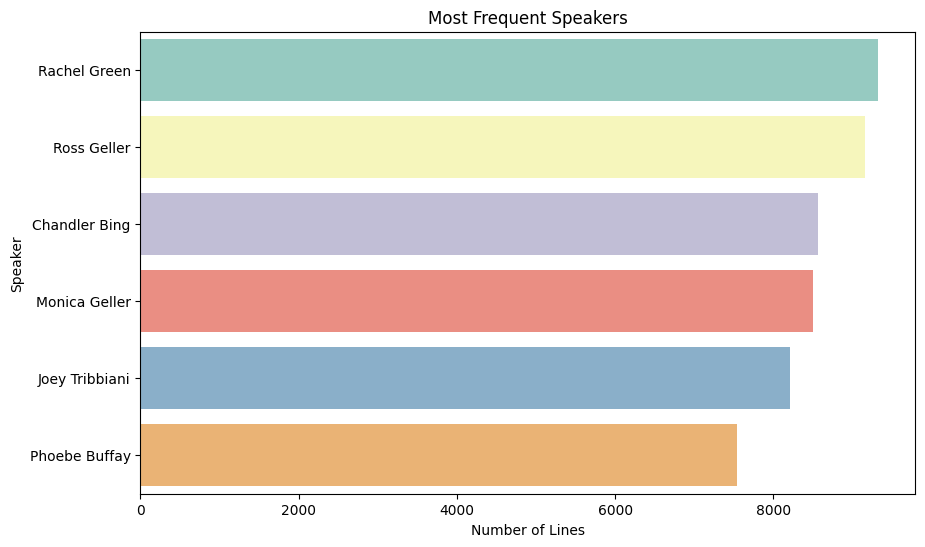

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

top_speakers = df['speaker'].value_counts()

# Barplot of the main characters of Friends in order of frequency of speaking
plt.figure(figsize=(10, 6))
sns.barplot(x=top_speakers.values, y=top_speakers.index, palette="Set3")
plt.title("Most Frequent Speakers")
plt.xlabel("Number of Lines")
plt.ylabel("Speaker")
plt.show()

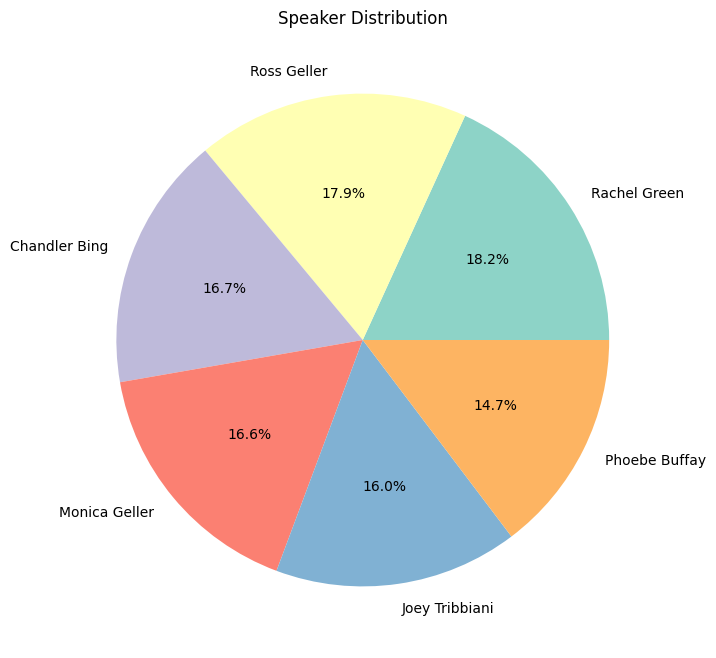

In [8]:
# Pie chart for speaker distribution
speaker_counts = df['speaker'].value_counts()

plt.figure(figsize=(8, 8))
speaker_counts.plot.pie(autopct='%1.1f%%', colors=sns.color_palette("Set3", len(speaker_counts)))
plt.title("Speaker Distribution")
plt.ylabel('')
plt.show()


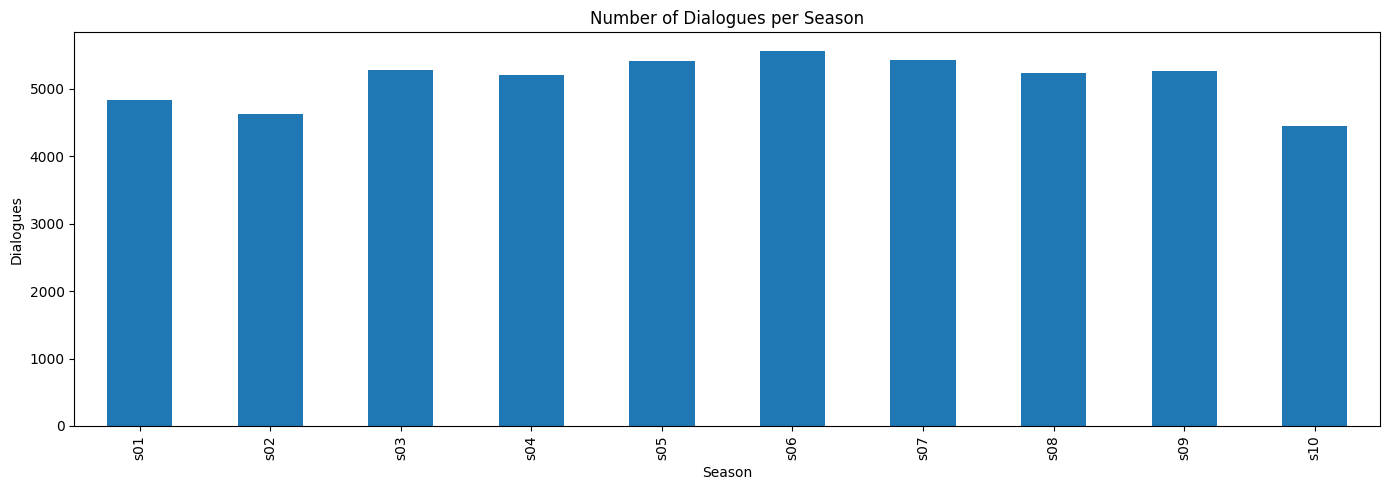

In [9]:
dialogues_per_season = df['season_id'].value_counts().sort_index()

# Barplot of the number of dialogues in each season from Season 1-10
plt.figure(figsize=(14, 5))
dialogues_per_season.plot(kind='bar')
plt.title("Number of Dialogues per Season")
plt.xlabel("Season")
plt.ylabel("Dialogues")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

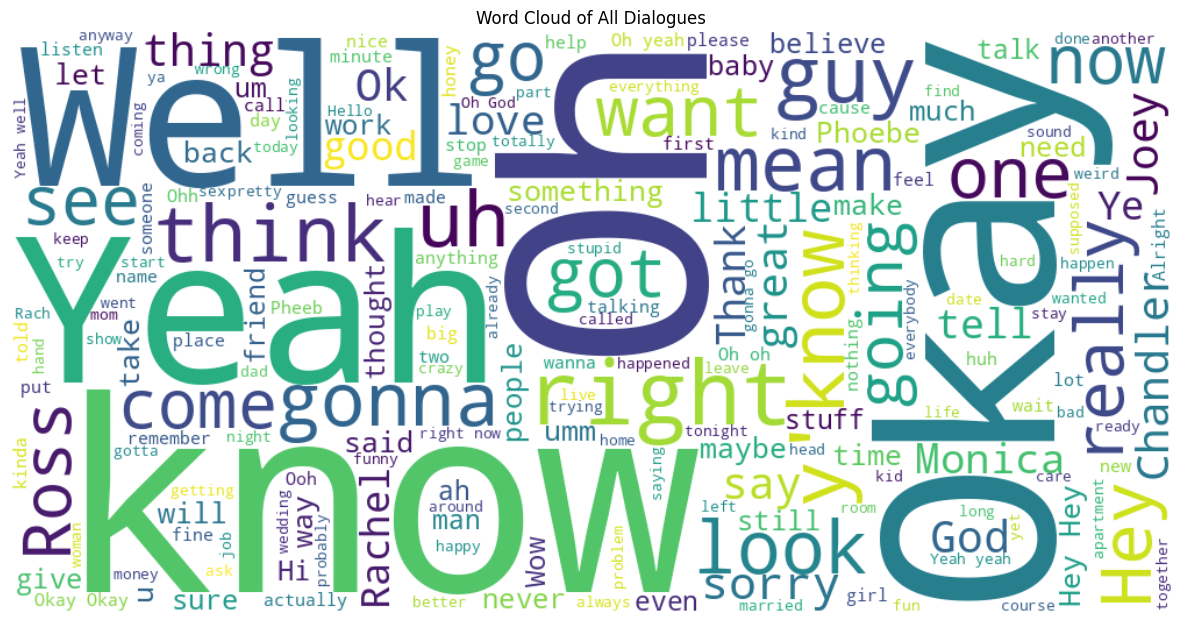

In [10]:
from wordcloud import WordCloud

text = " ".join(line for line in df['transcript'].dropna())

wordcloud = WordCloud(width=1000, height=500, background_color="white").generate(text)

plt.figure(figsize=(15, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud of All Dialogues")
plt.show()

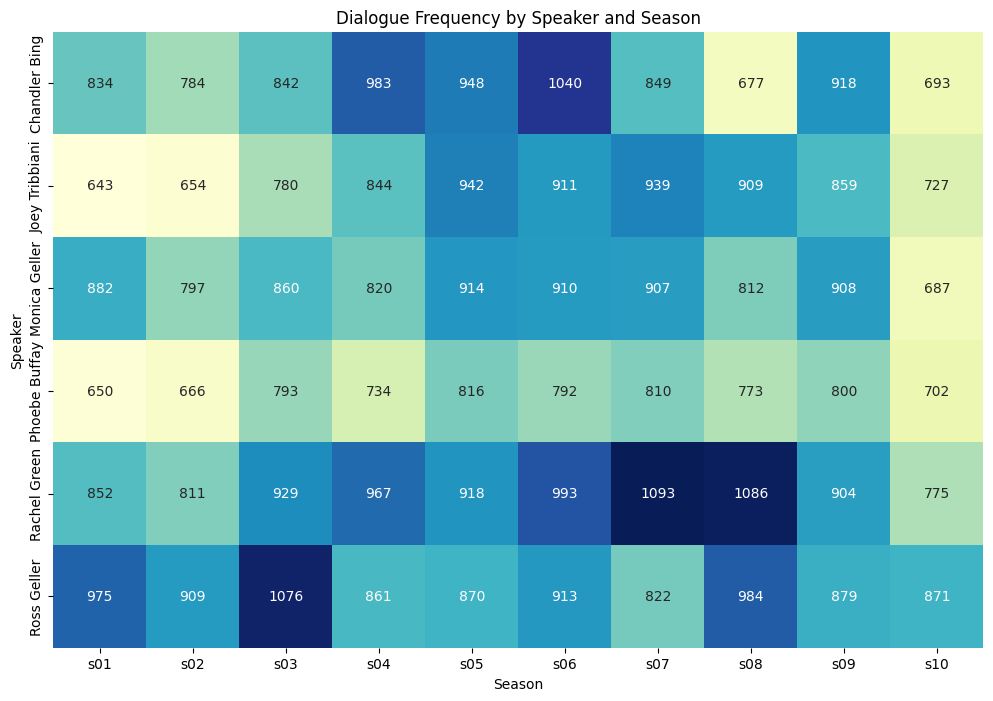

In [11]:
# Create a pivot table of speakers vs seasons
pivot_table = df.pivot_table(index='speaker', columns='season_id', aggfunc='size', fill_value=0)

plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, cmap="YlGnBu", annot=True, fmt="d", cbar=False)
plt.title("Dialogue Frequency by Speaker and Season")
plt.xlabel("Season")
plt.ylabel("Speaker")
plt.show()


/tmp/ipykernel_37667/2321625857.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='speaker', y='Dialogue_length', data=df, palette="Set2")


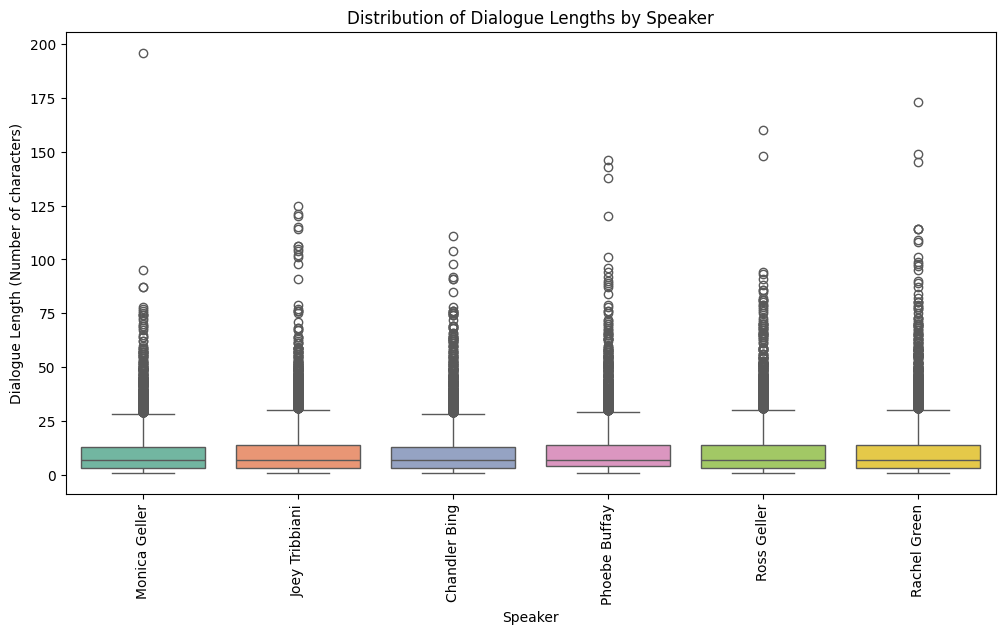

In [12]:
# Count number of words in each dialogue (split by whitespace)
df['Dialogue_length'] = df['transcript'].apply(lambda x: len(str(x).split()))

# Box plot for the lengths of dialogues of each character
plt.figure(figsize=(12, 6))
sns.boxplot(x='speaker', y='Dialogue_length', data=df, palette="Set2")
plt.title("Distribution of Dialogue Lengths by Speaker")
plt.xlabel("Speaker")
plt.ylabel("Dialogue Length (Number of characters)")
plt.xticks(rotation=90)
plt.show()

In [13]:
# Dialogues longer than 100 words
long_dialogues = df[df['Dialogue_length'] > 100]

# Print the dialogue text, the speaker, the season and the dialogue length
for index, row in long_dialogues.iterrows():
    print(f"\nSpeaker: {row['speaker']}")
    print(f"Word Count: {row['Dialogue_length']}")
    print(f"Dialogue: {row['transcript']}")
    print(f"\nSeason: {row['season_id']}")



Speaker: Rachel Green
Word Count: 149
Dialogue: Oh God... well, it started about a half hour before the wedding. I was in the room where we were keeping all the presents, and I was looking at this gravy boat. This really gorgeous Lamauge gravy boat. When all of a sudden- Sweet 'n' Lo?- I realized that I was more turned on by this gravy boat than by Barry! And then I got really freaked out, and that's when it hit me: how much Barry looks like Mr. Potato Head. Y'know, I mean, I always knew looked familiar, but... Anyway, I just had to get out of there, and I started wondering 'Why am I doing this, and who am I doing this for?'. So anyway I just didn't know where to go, and I know that you and I have kinda drifted apart, but you're the only person I knew who lived here in the city.

Season: s01

Speaker: Ross Geller
Word Count: 148
Dialogue: No, it's just...you know the whole "getting on with your life" thing. Well, do I have to? I mean, I'm sitting here with this cute woman, and, and, a

In [14]:
print(f"Number of dialogues longer than 100 words: {len(long_dialogues)}")

Number of dialogues longer than 100 words: 30


/tmp/ipykernel_37667/3616589325.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=long_dialogues, x='season_id', palette='coolwarm')


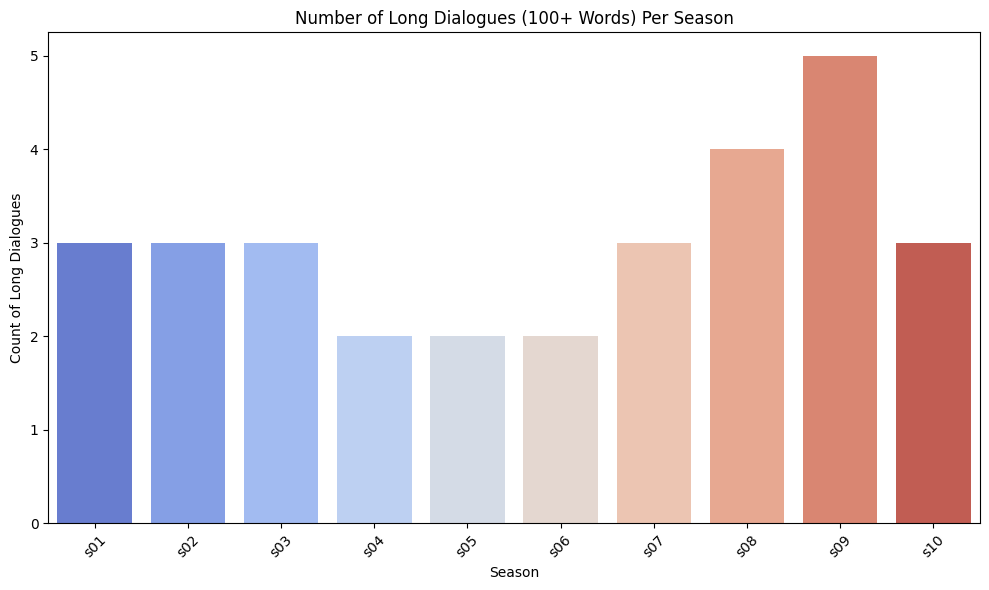

In [15]:
plt.figure(figsize=(10, 6))
sns.countplot(data=long_dialogues, x='season_id', palette='coolwarm')
plt.title('Number of Long Dialogues (100+ Words) Per Season')
plt.xlabel('Season')
plt.ylabel('Count of Long Dialogues')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Implications, Biases, and Limitations of the Dataset

Our cleaned and visualized dataset, which focuses on the six main characters of *Friends*, reveals key patterns that have direct implications for training or evaluating a chatbot designed to "imitate a friend."

### Speaker Bias
Joey and Chandler dominate in total lines, which may bias the chatbot toward humorous or less emotionally nuanced responses unless balanced sampling is introduced. Monica, by contrast, appears less frequently, potentially limiting training data on more pragmatic or assertive speech styles.

### Dialogue Structure
From the boxplot, Phoebe’s lines tend to be longer, suggesting more storytelling or philosophical content. This helps in modeling quirky or abstract friend-like conversations — but may not represent general casual chats.

### Seasonal Variability
The number of dialogues per season is uneven, possibly affecting topic diversity or maturity of tone (e.g., earlier seasons are lighter, later seasons more introspective).


### Content Limitations

- The dataset consists solely of raw transcripts — no tone, emotion tags, or scene context.
- Sarcasm, humor, and emotional subtext are hard to detect without additional annotation or prosodic features.


### Character Bias
By filtering only the six main characters, we've removed supporting characters who might add conversational diversity (e.g., Janice’s exaggerated tone or Gunther’s awkward delivery). However, this helps maintain focus for a chatbot aiming to sound like a core friend rather than a stranger.


### Feasibility
Despite lacking emotional labels or dialogue turns (who speaks after whom), the dataset is still highly feasible for training a character-specific, persona-driven chatbot. The speakers have distinct language styles, vocabularies, and tones — ideal for building chatbot personas or evaluating how closely chatbot responses match a given character.
